# Familiarization with FEniCS

## Introduction

Many differential equations of interest cannot be solved exactly; however, they may be solved approximately if given some simplifying assumptions.  For example, perturbation methods approximate an *inner* and *outer* solution to a problem with different characteristic length or time scales, Taylor-series approximations determine a locally convergent solution, and finite-difference methods provide an approximation over a discretized domain.  The finite element method is a technique which discretizes the domain of a variational or weighted-residual problem into *finite elements*, which may then be assembled into a single matrix equation and solved for an approximate solution.

## Weighted integral approximate solutions


The approximation of a differential equation with unknown variable $u$ which we seek is
$$u(x) \approx \sum_{i=0}^N u_i \psi_i,$$
where $u_i$ are coefficients to the solution, $N$ is the number of parameters in the approximation, and $\psi$ is a set of linearly independent functions which satisfy the boundary conditions of the equation.  For example, consider the second-order differential equation
$$-\frac{d}{dx} \left[ k \frac{du}{dx} \right] + u = 0, \hspace{5mm} 0 < x < 1,$$
$$u(0) = 1, \hspace{10mm} \left( \frac{du}{dn} \right) \Bigg|_{x=1} = 0,$$
where $n$ is the outward-pointing normal to the domain, in this 1D case, $n(0) = -1$ and $n(1) = 1$.  The $N=2$ parameter approximation with $k=1$ and
$$
\begin{align*}
  \psi_0 = 1, \hspace{5mm} \psi_1 = x^2 - 2x, \hspace{2.5mm} \text{and} \hspace{2.5mm} \psi_2 = x^3 - 3x,
\end{align*}
$$
gives the approximate solution
$$u(x) \approx U_N = u_0 + u_1 (x^2 - 2x) + u_2 (x^3 - 3x).$$
This approximation satisfies the *natural* boundary condition at $x=1$, and in order to satisfy the *essential* boundary condition at $x=0$, we make $u_0 = 1$,
$$u(x) \approx U_N = 1 + u_1 (x^2 - 2x) + u_2 (x^3 - 3x).$$
Substituting this approximation into the differential equation, we have

$$\begin{align*}
  - 2u_1(x - 1) - 3u_2(x^2 - 1) + 1 + u_1(x^2 - 2x) + u_2 (x^3 - 3x) &= 0 \\
  (2u_1 + 3u_2 + 1) - (2u_1 + 2u_1 + 3u_2)x - (3u_2 - u_1)x^2 + u_2x^3 &= 0,
\end{align*}$$

implying that

$$\begin{align*}
  2u_1 + 3u_2 + 1 &= 0 \\
  4u_1 + 3u_2 &= 0 \\
  3u_2 - u_1 &= 0 \\
  u_2 &= 0.
\end{align*}$$

This system of equations has only the trivial solution $u=0$ and is hence inconsistent with our differential equation.  However, we can guarantee that we have the same number of linearly independent equations as there are parameters if we evaluate the problem as a *weighted integral*, that is
$$\int_0^1 w R dx = 0,$$
where $R$ is the residual of our equation,
$$R = - \frac{d^2 U_N}{dx^2} + U_N,$$
and $w$ are a set of $N$ linearly independent *weight functions*.  For this example we use
$$w_1 = x, \hspace{2.5mm} \text{and} \hspace{2.5mm} w_2 = x^2,$$
and we now have two integral relations to evaluate,

$$
\begin{align*}
  0 &= \int_0^1 w_1 R dx = \int_0^1 x R dx \\
    &= \left[ \frac{1}{2}(2u_1 + 3u_2 + 1)x^2 - \frac{1}{3}(4u_1 + 3u_2)x^3 - \frac{1}{4}(3u_2 - u_1)x^4 + \frac{1}{5}u_2x^5 \right]_0^1 \\
    &= \frac{1}{2}(2u_1 + 3u_2 + 1) - \frac{1}{3}(4u_1 + 3u_2)x^3 - \frac{1}{4}(3u_2 - u_1) + \frac{1}{5}u_2 \\
    &= \frac{1}{2} + \left( 1 - \frac{4}{3} + \frac{1}{4} \right) u_1 + \left( \frac{3}{2} - 1 - \frac{3}{4} + \frac{1}{5} \right) u_2 \\
    &= \frac{1}{2} - \frac{1}{12} u_1 - \frac{1}{20} u_2, \\
  0 &= \int_0^1 w_2 R dx = \int_0^1 x^2 R dx \\
    &= \left[ \frac{1}{3}(2u_1 + 3u_2 + 1)x^3 - \frac{1}{4}(4u_1 + 3u_2)x^4 - \frac{1}{5}(3u_2 - u_1)x^5 + \frac{1}{6}u_2x^6 \right]_0^1 \\
    &= \frac{1}{3}(2u_1 + 3u_2 + 1) - \frac{1}{4}(4u_1 + 3u_2) - \frac{1}{5}(3u_2 - u_1) + \frac{1}{6}u_2 \\
    &= \frac{1}{3} + \left( \frac{2}{3} - 1 + \frac{1}{5} \right) u_1 + \left( 1 - \frac{3}{4} - \frac{3}{5} + \frac{1}{6} \right) u_2 \\
    &= \frac{1}{3} - \frac{2}{15} u_1 - \frac{11}{60} u_2,
\end{align*}
$$

giving a system of equations for the coefficients $u_1$ and $u_2$,

$$
\begin{align*}
  \begin{bmatrix}
    - \frac{1}{12} & - \frac{1}{20} \\
    - \frac{2}{15} & - \frac{11}{60} \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    u_1 \\
    u_2
  \end{bmatrix} = 
  \begin{bmatrix}
    -\frac{1}{2} \\
    -\frac{1}{3}
  \end{bmatrix}
\end{align*}
$$

which when solved gives $u_1 = \frac{270}{31}$ and $u_2 = \frac{-140}{31}$, so our approximation is
$$u_N(x) = 1 + \frac{270}{31} (x^2 - 2x) - \frac{140}{31} (x^3 - 3x).$$

### Exact solution

This differential equation may also be solved exactly:
$$\frac{d^2 u}{dx^2} - u = 0 \hspace{2.5mm} \implies \hspace{2.5mm} u = c_1 \cosh(x) + c_2 \sinh(x)$$ 
$$u(0) = c_1 = 1, \hspace{5mm} u'(1) = \sinh(1) + c_2 \cosh(1) = 0$$
$$\implies c_2 = -\frac{\sinh(1)}{\cosh(1)} = -\tanh(1),$$
and our exact solution is
$$u(x) = \cosh(x) - \tanh(1)\sinh(x).$$
The weighted integral approximation and exact solution are presented below.

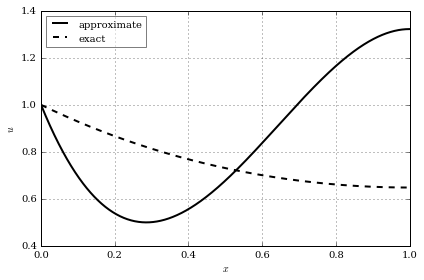

In [7]:
%matplotlib inline
from pylab import *

x = linspace(0,1,1000)

u1 = 270/31.
u2 = -140/31.

u = 1 + u1*(x**2 - 2*x) + u2*(x**3 - 3*x)
e = cosh(x) - tanh(1)*sinh(x)


mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig = figure()
ax  = fig.add_subplot(111)

ax.plot(x, u, 'k',   lw=2.0, label='approximate')
ax.plot(x, e, 'k--', lw=2.0, label='exact')

#ax.set_xlim(0,2*pi)
leg = ax.legend(loc="upper left")
leg.get_frame().set_alpha(0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.grid()

tight_layout()
savefig("images/intro/weight_int.pdf")
show()

Weighted integral approximation (solid) and exact solution (dashed).  Note that the approximation will be improved by increasing $N$.

# The finite element method

The finite element method combines variational calculus, Galerkin approximation methods, and numerical analysis to solve initial and boundary value differential equations.  As stated in, the steps involved in the finite element analysis of a typical problem are

* Discretization of the domain into finite elements.
* Derivation of element equations over each element in the mesh.
* Assembly of local element equations into a global system of equations.
* Imposition of boundary conditions.
* Numerical solution of assembled equations.

In the following sections, we examine each of these steps for the 1D-boundary-value problem
$$-\frac{d}{dx} \left[ k(x) \frac{du}{dx} \right] = f(x), \hspace{5mm} 0 < x < \ell,$$
$$u(0) = u_0, \hspace{10mm} \left( k(x) \frac{du}{dn} \right) \Bigg|_{x=\ell} = g(x),$$
and thus develop a full finite-element model from scratch.

## Variational form

The corresponding variational problem is formed by multiplying the equation by a so-called *weight function*, $w(x)$, and integrating over the domain, here the $x$-coordinate
$$-\int_0^{\ell} \frac{d}{dx} \left[ k(x) \frac{du}{dx} \right] w(x) dx = \int_0^{\ell} f(x) w(x) dx,$$
where no restrictions have been made for $w(x)$ thus far.  We can integrate the left-hand side by parts,

$$
\begin{align*}
  \int_0^{\ell} k \frac{du}{dx} \frac{dw}{dx} dx - \left[ wk\frac{du}{dn}\right]_0^{\ell} &= \int_0^{\ell} f w dx,
\end{align*}
$$

which is the variational form with *bilinear* term $a$ and *linear* term $l$ where

$$
\begin{align*}
  a(u,w) &= l(w), \\
  a(u,w) &= \int_0^{\ell} k \frac{du}{dx} \frac{dw}{dx} dx - \left[ wk\frac{du}{dn}\right]_0^{\ell} \\
  l(w)   &= \int_0^{\ell} f w dx.
\end{align*}
$$

This formulation is called the *weak form* of the differential equation due to the "weakened" conditions on the approximation functions $\psi$ in the approximation of $u(x)$, as explained in the next section.

## Element equations

Again, we would like an $n$-node approximation over a single element $e$ of the form
$$u \approx U^e = \sum_{j=1}^n u_j^e \psi_j^e,$$
where $u_j^e$ is the unknown value at node $j$ of element $e$ and $\psi^e$ is a set of $n$ linearly independent approximation functions, otherwise know as *interpolation* functions, for each of the $n$ nodes of element $e$.  The approximation functions must be continuous over the element and be differentiable to the same order as the equation.

For the simplest example, the linear interpolation functions with $C^0$ continuity, known as *Lagrange* interpolation functions, are defined as

$$
\begin{align*}
  \psi_1^e(x) = 1 - \frac{x}{h_e} \hspace{10mm} \psi_2^e(x) = \frac{x}{h_e},
\end{align*}
$$

where $h_e$ is the width of element $e$.  Note that these functions are once differentiable as required by the weak form of our example equation, and satisfies the required *interpolation properties*

$$
\begin{align*}
  \psi_i^e(x_j^e) = \delta_{ij} \hspace{10mm} \sum_{j=1}^n \psi_j^e(x) = 1,
\end{align*}
$$

where $\delta_{ij}$ is the Kronecker delta.

![lagrange](images/intro/lagrange_ftns.png)

**Fig 2:** Lagrange interpolation functions $\psi^e$, where the superscript is the element number and subscript the element function number.  The even element functions are solid and the odd functions dashed, color-coded by element number.

If we now place the approximation into our weak form integrated over a single element with weight functions $w = \psi$ and add terms for the flux variables interior to the nodes, we have

$$
\begin{align*}
  \int_x k \left( \sum_{j=1}^n u_j^e \frac{d\psi_j^e}{dx} \right) \frac{d\psi_i^e}{dx} dx = \int_x f \psi_i^e dx + \sum_{j=1}^n \psi_i^e(x_j^e) Q_j^e, \hspace{5mm} i = 1,2,\ldots,n,
\end{align*}
$$

where $Q_j^e$ is the outward flux from node $j$ of element $e$,

$$
\begin{align*}
  Q_j^e = k \frac{du_j^e}{dn}.
\end{align*}
$$

Using the interpolation property,

$$
\begin{align*}
  \sum_{j=1}^n \psi_i^e(x_j^e) Q_j^e = \sum_{j=1}^n \delta_{ij} Q_j^e = Q_i^e,
\end{align*}
$$

and the fact that the $u_j^e$ are constant,

$$
\begin{align*}
  \int_x k \left( \sum_{j=1}^n u_j^e \frac{d\psi_j^e}{dx} \right) \frac{d\psi_i^e}{dx} dx =  \sum_{j=1}^n u_j^e \int_x k \frac{d\psi_j^e}{dx} \frac{d\psi_i^e}{dx} dx, 
\end{align*}
$$

the system may rewritten as

$$
\begin{align*}
  \sum_{j=1}^n K_{ij}^e u_j^e = f_i^e + Q_i^e, \hspace{5mm} i = 1,2,\ldots,n,
\end{align*}
$$

with bilinear and linear terms

$$
\begin{align*}
  a\left( \psi_i^e, \psi_j^e \right) = K_{ij}^e = \int_x k \frac{d\psi_j^e}{dx} \frac{d\psi_i^e}{dx} dx, \hspace{10mm} l\left( \psi_i^e \right) = f_i^e = \int_x f \psi_i^e dx,
\end{align*}
$$

or as a matrix equation,

$$
\begin{align*}
 K \mathbf{u} = \mathbf{f} + \mathbf{q}.
\end{align*}
$$

## Local element matrix equations

Using the linear Lagrange interpolation functions, and evaluating the weak form over a single element $e$ of width $h_e$, we have

$$
\begin{align*}
  K_{ij}^e = \int_0^{h_e} k_e \frac{d\psi_j^e}{dx} \frac{d\psi_i^e}{dx} dx, \hspace{5mm} f_i^e = \int_0^{h_e} f_e \psi_i^e dx, \hspace{5mm} i,j \in \{1,2\}.
\end{align*}
$$

Evaluating the *stiffness matrix* for the element first,

$$
\begin{align*}
  K_{11}^e &= \int_0^{h_e} k_e \frac{d\psi_1^e}{dx} \frac{d\psi_1^e}{dx} dx \\
           &= \int_0^{h_e} k_e \left( -\frac{1}{h_e} \right) \left( -\frac{1}{h_e} \right) dx \\
           &= k_e \left(\frac{x}{h_e^2} \right) \Bigg|_0^{h_e} \\
           &= \frac{k_e}{h_e} \\
  K_{12}^e &= \int_0^{h_e} k_e \frac{d\psi_2^e}{dx} \frac{d\psi_1^e}{dx} dx \\
           &= \int_0^{h_e} k_e \left( -\frac{1}{h_e} \right) \left( \frac{1}{h_e} \right) dx \\
           &= -k_e \left(\frac{x}{h_e^2} \right) \Bigg|_0^{h_e} \\
           &= -\frac{k_e}{h_e} \\
  K_{21}^e &= \int_0^{h_e} k_e \frac{d\psi_1^e}{dx} \frac{d\psi_2^e}{dx} dx \\
           &= \int_0^{h_e} k_e \left( \frac{1}{h_e} \right) \left( -\frac{1}{h_e} \right) dx \\
           &= -k_e \left(\frac{x}{h_e^2} \right) \Bigg|_0^{h_e} \\
           &= -\frac{k_e}{h_e} \\
  K_{22}^e &= \int_0^{h_e} k_e \frac{d\psi_2^e}{dx} \frac{d\psi_2^e}{dx} dx \\
           &= \int_0^{h_e} k_e \left( \frac{1}{h_e} \right) \left( \frac{1}{h_e} \right) dx \\
           &= k_e \left(\frac{x}{h_e^2} \right) \Bigg|_0^{h_e} \\
           &= \frac{k_e}{h_e}
\end{align*}
$$

and for the source term $f$,

$$
\begin{align*}
  f_1^e &= \int_0^{h_e} f_e \psi_1^e dx \\
        &= \int_0^{h_e} f_e \left( 1 - \frac{x}{h_e} \right) dx \\
        &= f_e \left( x - \frac{x^2}{2h_e} \right) \Bigg|_0^{h_e} \\
        &= f_e \left( h_e - \frac{h_e^2}{2h_e} \right) \\
        &= f_e \left( h_e - \frac{h_e}{2} \right) \\
        &= \frac{1}{2} f_e h_e \\
  f_2^e &= \int_0^{h_e} f_e \psi_2^e dx \\
        &= \int_0^{h_e} f_e \left( \frac{x}{h_e} \right) dx \\
        &= f_e \left( \frac{x^2}{2h_e} \right) \Bigg|_0^{h_e} \\
        &= f_e \left( \frac{h_e^2}{2h_e} \right) \\
        &= f_e \left( \frac{h_e}{2} \right) \\
        &= \frac{1}{2} f_e h_e.
\end{align*}
$$

Finally, our *local* element matrix equation becomes

$$
\begin{align*}
 K \mathbf{u} &= \mathbf{f} + \mathbf{q} \\
 \frac{k_e}{h_e}
 \begin{bmatrix}[r]
   1 & -1 \\
   -1 & 1 
 \end{bmatrix} \cdot 
 \begin{bmatrix}
   u_1^e \\ u_2^e
 \end{bmatrix} &= 
 \frac{f_e h_e}{2}
 \begin{bmatrix}
   1 \\ 1
 \end{bmatrix} + 
 \begin{bmatrix}
   Q_1^e \\ Q_2^e
 \end{bmatrix}.
\end{align*}
$$

## Globally assembled matrix equations

In order to connect the set of elements together, we require that

* The *primary variables* are continuous between nodes such that the last nodal value of an element is equal to its adjacent element's first nodal value,
  $$u_n^e = u_1^{e+1}.$$
* The *secondary variables* are balanced between nodes such that outward flux from a connected element is equal to the negative outward flux of its neighboring node,
  $$Q_n^e + Q_1^{e+1} = 0.$$
  If a point source is applied or we wish to make $Q$ an unknown to be determined,
  $$Q_n^e + Q_1^{e+1} = Q_0.$$

First, we define for global node $N$

$$U_N = u_n^{N} = u_1^{N+1}, \hspace{5mm} f_N = f_n^{N} + f_1^{N+1}, \hspace{2.5mm} \text{and} \hspace{2.5mm} Q_N = 
Q_n^{N} + Q_1^{N+1},$$

and we add the last equation from element $e$ to the first equation for element $e+1$,

$$
\begin{align*}
  \sum_{j=1}^n K_{nj}^e u_j^e + \sum_{j=1}^n K_{1j}^{e+1} u_j^{e+1} &= \left( f_n^e + Q_n^e \right) + \left( f_1^{e+1} + Q_1^{e+1} \right) \\
  \sum_{j=1}^n \left( K_{nj}^e u_j^e + K_{1j}^{e+1} u_j^{e+1} \right) &= f_n^e + f_1^{e+1} + Q_n^e + Q_1^{e+1} \\
  \sum_{j=1}^n U_j \left( K_{nj}^e + K_{1j}^{e+1} \right) &= f_e + Q_e,
\end{align*}
$$

which we can transform into our $global$ matrix equation,

$$K\mathbf{u} = \mathbf{f} + \mathbf{q},$$

where

$$
\begin{align*}
  K &=
  \begin{bmatrix}
    K_{11}^1 & K_{12}^1            &                                                   &                         &            \\
    K_{21}^1 & K_{22}^1 + K_{11}^2 & K_{12}^2            &                             &                         &            \\
             & K_{21}^2            & K_{22}^2 + K_{11}^3 & K_{12}^3                    &                         &            \\
             &                     & \hspace{10mm}\ddots &                             &                         &            \\ 
             &                     & K_{21}^{E-2}        & K_{22}^{E-2} + K_{11}^{E-1} & K_{12}^{E-1}            &            \\
             &                     &                     & K_{21}^{E-1}                & K_{22}^{E-1} + K_{11}^E & K_{12}^E   \\
             &                     &                     &                             & K_{21}^{E}              & K_{22}^{E} 
  \end{bmatrix} \\
  \mathbf{u} &= \begin{bmatrix} U_1 & U_2 & \cdots & U_E \end{bmatrix}^T \\
  \mathbf{f} &= \begin{bmatrix} f_1 & f_2 & \cdots & f_E \end{bmatrix}^T \\
  \mathbf{q} &= \begin{bmatrix} Q_1 & Q_2 & \cdots & Q_E \end{bmatrix}^T.
\end{align*}
$$

Using the Lagrange element equations derived previously, we subdivide the domain $x \in [0,\ell]$ into 3 equal width parts, and make coefficients $k$ and source term $f$ to be constant throughout the domain,

$$
\begin{align*}
  K\mathbf{u} &= \mathbf{f} + \mathbf{q} \\
  \frac{k}{h_e}
  \begin{bmatrix}
     1 & -1 &  0 &  0 \\
    -1 &  2 & -1 &  0 \\
     0 & -1 &  2 & -1 \\
     0 &  0 & -1 &  1 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} U_1 \\ U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \frac{f h_e}{2}
  \begin{bmatrix} 1   \\ 2   \\ 2   \\ 1   \end{bmatrix} +
  \begin{bmatrix} Q_1 \\ Q_2 \\ Q_3 \\ Q_4 \end{bmatrix},
\end{align*}
$$

a system of four equations for eight unknowns.  In the next section, this under-determined system is made solvable by applying the boundary conditions and continuity requirements on the internal element flux terms, $Q_e$.

## Imposition of boundary conditions

Recall for our equation we use the essential and natural boundary conditions

$$u(0) = U_1 = u_0, \hspace{10mm} \left( k \frac{du}{dx} \right) \Bigg|_{x=\ell} = Q_4 = g.$$

We now include the continuity requirement for the interior nodes,

$$Q_e = Q_n^e + Q_1^{e+1} = 0, \hspace{10mm} e = 2,3,$$

making our global matrix equation

$$
\begin{align*}
  \frac{k}{h_e}
  \begin{bmatrix}
     1 & -1 &  0 &  0 \\
    -1 &  2 & -1 &  0 \\
     0 & -1 &  2 & -1 \\
     0 &  0 & -1 &  1 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} u_0 \\ U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \frac{f h_e}{2}
  \begin{bmatrix} 1   \\ 2   \\ 2   \\ 1   \end{bmatrix} +
  \begin{bmatrix} Q_1 \\ 0   \\ 0   \\ g   \end{bmatrix},
\end{align*}
$$

a system of four equations for the four unknowns $U_2$, $U_3$, $U_4$, and $Q_1$.

## Solving procedure

Before we solve this matrix equation, we must choose values for the known variables and define the length of the domain.  For simplicity, we make

$$u_0 = 0, \hspace{5mm} g = 0, \hspace{5mm} k = 1, \hspace{5mm} f=1,$$
$$\text{and} \hspace{2.5mm}  0 < x < 1 \hspace{2.5mm} \iff \hspace{2.5mm} h_e = \frac{1}{3}.$$

Our equation simplifies to

$$
\begin{align*}
  K\mathbf{u} &= \mathbf{f} + \mathbf{q} \\
  \begin{bmatrix}
     3 & -3 &  0 &  0 \\
    -3 &  6 & -3 &  0 \\
     0 & -3 &  6 & -3 \\
     0 &  0 & -3 &  3 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} 0   \\ U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \frac{1}{6}
  \begin{bmatrix} 1   \\ 2   \\ 2   \\ 1   \end{bmatrix} +
  \begin{bmatrix} Q_1 \\ 0   \\ 0   \\ 0   \end{bmatrix} \\
  \begin{bmatrix}
     3 & -3 &  0 &  0 \\
    -3 &  6 & -3 &  0 \\
     0 & -3 &  6 & -3 \\
     0 &  0 & -3 &  3 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} 0   \\ U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \begin{bmatrix} Q_1 + \frac{1}{6} \\ \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{6} \end{bmatrix}.
\end{align*}
$$

To solve this, we first reduce the equation to include only the unknown primary *degrees of freedom*, $U_e$.  The system of equations reduces to

$$
\begin{align*}
  \begin{bmatrix}
     6 & -3 &  0 \\
    -3 &  6 & -3 \\
     0 & -3 &  3 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \begin{bmatrix} \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{6} \end{bmatrix}.
\end{align*}
$$

Because this matrix is square and non-singular, we know that $K = LU$, where $L$ and $U$ are lower- and upper-triangular matrices.  Thus the system of equations can be solved by forward and backward substitutions,

$$
\begin{align*}
  L\mathbf{y} &= \mathbf{q} \hspace{5mm} \leftarrow \hspace{5mm} \text{forward substitution}, \\
  U\mathbf{u} &= \mathbf{y} \hspace{5mm} \leftarrow \hspace{5mm} \text{backward substitution.}
\end{align*}
$$

For our $K$, we have

$$
\begin{align*}
  L &= 
  \begin{bmatrix}
     1           &  0           &  0 \\
    -\frac{1}{2} &  1           &  0 \\
     0           & -\frac{2}{3} &  1
  \end{bmatrix} \\
  U &=
  \begin{bmatrix}
     6 & -3           &  0 \\
     0 &  \frac{9}{2} & -3 \\
     0 &  0           &  1
  \end{bmatrix},
\end{align*}
$$

and thus

$$
\begin{align*}
  L\mathbf{y} &= \mathbf{q} \\
  \begin{bmatrix}
     1           &  0           &  0 \\
    -\frac{1}{2} &  1           &  0 \\
     0           & -\frac{2}{3} &  1 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} &=
  \begin{bmatrix} \frac{1}{3} \\ \frac{1}{3} \\ \frac{1}{6} \end{bmatrix}
\end{align*}
$$

provides $\mathbf{y} = \begin{bmatrix} \frac{11}{54} & \frac{8}{27} & \frac{2}{3} \end{bmatrix}^T$, which we can then use in our backward substitution

$$
\begin{align*}
  U\mathbf{u} &= \mathbf{y} \\
  \begin{bmatrix}
     6 & -3           &  0 \\
     0 &  \frac{9}{2} & -3 \\
     0 &  0           &  1 \\
  \end{bmatrix} \cdot
  \begin{bmatrix} U_2 \\ U_3 \\ U_4 \end{bmatrix} &=
  \begin{bmatrix} \frac{11}{54} \\ \frac{8}{27} \\ \frac{2}{3} \end{bmatrix},
\end{align*}
$$

giving $\mathbf{u} = \begin{bmatrix} \frac{5}{18} & \frac{4}{9} & \frac{1}{2} \end{bmatrix}^T$.  We can now solve for $Q_1$ from the first equation of our full system,

$$
\begin{align*}
  -3U_2 &= Q_1 + \frac{1}{6} \\
  -\frac{15}{18} - \frac{1}{6} &= Q_1 \\
  \implies Q_1 &= - 1.
\end{align*}
$$

Note that this term is not required to be computed, as the nodal values have been fully discovered; our final three-element solution to this problem is

$$\mathbf{u} = \begin{bmatrix} 0 & \frac{5}{18} & \frac{4}{9} & \frac{1}{2} \end{bmatrix}^T.$$

However, it is interesting to note the flux of quantity $u$ at the left endpoint that is derived from this calculation:

$$Q_1 = \left(k \frac{du}{dn} \right) \Bigg|_{x=0} = - \left(\frac{du}{dx} \right) \Bigg|_{x=0} = -1$$ 
$$\implies \left(\frac{du}{dx} \right) \Bigg|_{x=0} = 1.$$

The solution is computed with the following script :

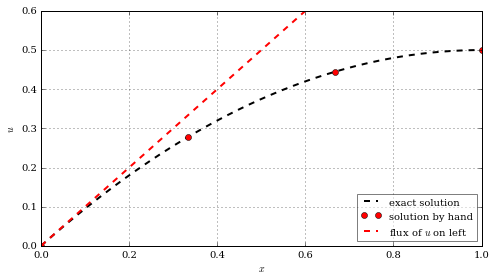

In [9]:
from pylab        import *
from scipy.linalg import lu
from scipy.linalg import solve as sl


K  = array([[6,-3,0],[-3,6,-3],[0,-3,3]])
F  = array([1/3., 1/3., 1/6.])

P,L,U = lu(K)
y     = sl(L,F)
uf    = sl(U,y)
uf    = append(0.0, uf)

xe = linspace(0,1,1000)
xf = linspace(0,1,4)

ue = -0.5*(xe - 2)*xe
us = xe

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig = figure(figsize=(7,4))
ax  = fig.add_subplot(111)

ax.plot(xe, ue, 'k--', lw=2.0, label='exact solution')
ax.plot(xf, uf, 'ro',  lw=2.0, label='solution by hand')
ax.plot(xe, us, 'r--', lw=2.0, label='flux of $u$ on left')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.set_ylim([0,0.6])
ax.grid()
leg = ax.legend(loc='lower right')
leg.get_frame().set_alpha(0.5)
tight_layout()
savefig("images/intro/scratch_example.pdf")
show()


## FEniCS framework

The FEniCS ([F]inite [E]lement [ni] [C]omputational [S]oftware) package for python and C++ is a set of packages for easily formulating finite element solutions for differential equations.  This software includes tools for automatically creating a variety of finite element function spaces, differentiating variational functionals, creating finite element meshes, and much more.  It also includes several linear algebra packages for solving the element equations, including PETSc, uBLAS, Epetra, and MTL4.

For an example of its capabilities, the finite element code for our introductory problem is completed with this simple script:

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


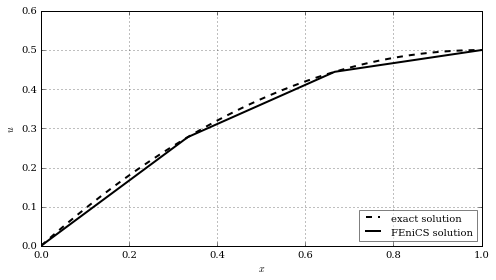

In [11]:
from fenics import *

mesh = IntervalMesh(3,0,1)
Q    = FunctionSpace(mesh, "CG", 1)

u    = TrialFunction(Q)
v    = TestFunction(Q)

f    = Constant(1.0)
a    = u.dx(0) * v.dx(0) * dx
l    = f * v * dx

def left(x, on_boundary):
  return x[0] == 0 and on_boundary
bc   = DirichletBC(Q, 0.0, left)

u    = Function(Q)
solve(a == l, u, bc)

#=======================================================================
# plot the thing again :

uv = u.vector().array()[::-1]

fig = figure(figsize=(7,4))
ax  = fig.add_subplot(111)

ax.plot(xe, ue, 'k--', lw=2.0, label='exact solution')
ax.plot(xf, uv, 'k-',  lw=2.0, label='FEniCS solution')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.set_ylim([0,0.6])
ax.grid()
leg = ax.legend(loc='lower right')
leg.get_frame().set_alpha(0.5)
tight_layout()
savefig("images/intro/scratch_example_fenics.pdf")
show()

Notice that we only require the weak form to solve.

# Extra problems and solutions with FEniCS

In the following sections, we will solve some 1-, 2-, and 3-dimensional problems with FEniCS.

## Second-order linear initial-value problem

For our first example, we shall begin with an inner and outer singular-perturbation solution to a second-order linear equation with non-constant coefficients,

$$\epsilon \ddot{u} - (2t + 1)\dot{u} + 2u = 0, \hspace{5mm} 0 < t < 1, \hspace{5mm} 0 < \epsilon \ll 1,$$
$$u(0) = 1, \hspace{5mm} u(1) = 0,$$

and compare it to the solution obtained by the finite element method.

### Singular perturbation solution

The solution to the unperturbed problem ($\epsilon = 0$) is found with the left boundary condition $u(0) = 1$:

$$
\begin{align*}
  - (2t + 1)\dot{u} + 2u = 0, \\
  \implies u(t) = c_1(2t + 1),
\end{align*}
$$

applying the boundary condition $u(0) = 1$, we have the outer solution

$$
\begin{align*}
  u_o(t) = 2t + 1.
\end{align*}
$$

In order to determine the width $\delta(\epsilon)$ of the boundary layer we rescale near $t=1$ via

$$
\begin{align*}
  \xi = \frac{1 - t}{\delta(\epsilon)}, \hspace{10mm} U(\xi) = u(t).
\end{align*}
$$

In scaled variables the differential equation becomes

$$
\begin{align*}
  \left( \frac{\epsilon}{\delta(\epsilon)^2} \right) \ddot{U} + \left( \frac{2 - 2\xi\delta(\epsilon) + 1}{\delta(\epsilon)}\right)\dot{U} + 2U &= 0 
\end{align*}
$$

For this problem we can retain the second derivative term by making $\delta(\epsilon) = \mathcal{O}\left(\epsilon\right)$, and our scaled differential equation is

$$
\begin{align*}
  \left( \frac{\epsilon}{\epsilon^2} \right) \ddot{U} + \left( \frac{2 - 2\xi\epsilon + 1}{\epsilon}\right)\dot{U} + 2U &= 0 \\ 
  \ddot{U} + 3\dot{U} - 2\xi\epsilon \dot{U} + 2\epsilon U &= 0.
\end{align*}
$$

The inner approximation to first order satisfies

$$
\begin{align*}
  \ddot{U} + 3\dot{U} = 0,
\end{align*}
$$

whose general solution is

$$
\begin{align*}
  U(\xi) = C_1 + C_2 e^{-3\xi},
\end{align*}
$$

in terms of $u$ and $t$

$$
\begin{align*}
  u(t) = C_1 + C_2 \exp\left( -3\left( \frac{1 - t}{\epsilon} \right) \right).
\end{align*}
$$

Applying the boundary condition $u(1) = 0$ in the boundary layer gives $C_1 = -C_2$ and therefore the inner approximation is

$$
\begin{align*}
  u_i(t) = C_2 \left( \exp\left( \frac{3t - 3}{\epsilon} \right) - 1 \right).
\end{align*}
$$

To find $C_2$ we introduce an overlap domain of order $\sqrt{\epsilon}$ and an appropriate intermediate scaled variable

$$\eta = \frac{1 - t}{\sqrt{\epsilon}}.$$

Then $t = 1 - \eta\sqrt{\epsilon}$ and the matching conditions becomes (with $\eta$ fixed)

$$
\begin{align*}
  \lim_{\epsilon \rightarrow 0^+} u_o\left(1 - \eta\sqrt{\epsilon}\right) = \lim_{\epsilon \rightarrow 0^+} u_i\left(1 - \eta\sqrt{\epsilon}\right),
\end{align*}
$$

or

$$
\begin{align*}
  0 = &+ \lim_{\epsilon \rightarrow 0^+} \exp\left( 2(1 - \eta\sqrt{\epsilon}) + 1 \right) \\
      &- \lim_{\epsilon \rightarrow 0^+} C_2\left(\exp\left(\frac{3(1 - \eta\sqrt{\epsilon}) - 3}{\epsilon} \right) - 1 \right) \\
  0 = &+ \lim_{\epsilon \rightarrow 0^+} \exp\left( 3 - 2\eta\sqrt{\epsilon} \right) \\
      &- \lim_{\epsilon \rightarrow 0^+} C_2\left(\exp\left(\frac{- 3\eta\sqrt{\epsilon}}{\epsilon} \right) - 1 \right) \\
  0 = &\ 3 + C_2 \implies C_2 = -3.
\end{align*}
$$

A uniform approximation $y_u(t)$ is found by adding the inner and outer approximations and subtracting the common limit in the overlap domain, which is $3$ in this case.  Consequently,

$$
\begin{align*}
  u_u(t) &= 2t + 1 - 3 \left( \exp\left( \frac{3t - 3}{\epsilon} \right) - 1 \right) - 3 \\
  &= 2t - 3 \exp\left( \frac{3t - 3}{\epsilon} \right) + 1.
\end{align*}
$$

### Finite element solution

We arrive at the weak form by multiplying the equation by the test function $\phi$ and integrating over the domain of the problem $\Omega$,

$$
\begin{align*}
  0 = &\int_{\Omega} \left[ \epsilon \ddot{u} - (2t + 1)\dot{u} + 2u \right] \phi d\Omega \\
  0 = &\epsilon \int_{\Omega} \frac{d^2 u}{dt^2} \phi d\Omega - \int_{\Omega} (2t + 1) \frac{du}{dt} \phi d\Omega + 2\int_{\Omega} u \phi d\Omega \\
  0 = &+\epsilon \int_{\Gamma} \left( \frac{du}{dt} \phi \right) n d\Gamma - \epsilon \int_{\Omega} \frac{du}{dt} \frac{d\phi}{dt} d\Omega \\
  &- \int_{\Omega} (2t + 1) \frac{du}{dt} \phi d\Omega + 2\int_{\Omega} u \phi d\Omega,
\end{align*}
$$

where the second derivative term has been integrated by parts and $n$ is the outward-pointing normal to the boundary $\Gamma$.  Because the boundary conditions are both Dirichlet, we can drop the integral over the boundary,

$$
\begin{align*}
  0 = - \epsilon \int_{\Omega} \frac{du}{dt} \frac{d\phi}{dt} d\Omega - \int_{\Omega} (2t + 1) \frac{du}{dt} \phi d\Omega + 2\int_{\Omega} u \phi d\Omega.
\end{align*}
$$

The solution is provided below.


DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


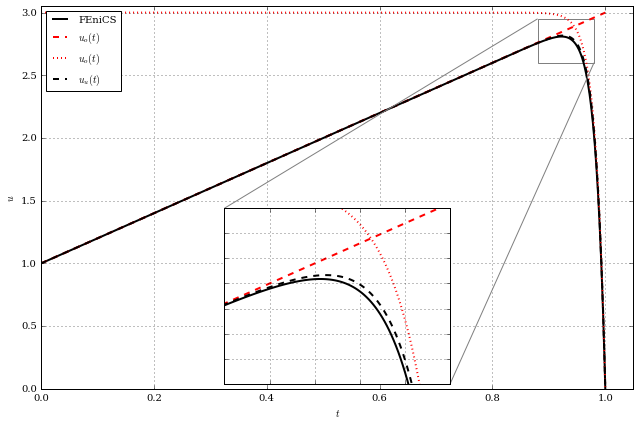

In [14]:
#===============================================================================
# finite-element solution :

from fenics import *

mesh = IntervalMesh(1000,0,1)
Q    = FunctionSpace(mesh, 'CG', 1)
x    = SpatialCoordinate(mesh)[0]
t    = mesh.coordinates()[:,0]

v    = TestFunction(Q)
u    = Function(Q)
du   = TrialFunction(Q)

eps  = 0.05

r    = - eps * u.dx(0) * v.dx(0) * dx \
       - (2*x + 1) * u.dx(0) * v * dx  \
       + 2 * u * v * dx \

def left(x, on_boundary):
  return on_boundary and x[0] == 0.0

def right(x, on_boundary):
  return on_boundary and x[0] == 1.0

leftBC  = DirichletBC(Q, 1.0, left)
rightBC = DirichletBC(Q, 0.0, right)

bcs = [leftBC, rightBC]
J   = derivative(r, u, du)

solve(r == 0, u, bcs=bcs, J=J)

uf = u.vector().array()[::-1]

#===============================================================================
# singular-perturbation method solution :

from pylab  import *

uo = 2*t + 1
ui = -3*(exp((3*t - 3)/eps) - 1)
ul = 3

uu = uo + ui - ul

#===============================================================================
# plot :

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

ax.set_xlim(0.0, 1.05)
ax.set_ylim(0.0, 3.05)

ax.plot(t, uf, 'k',   lw=2.0, label=r"FEniCS")
ax.plot(t, uo, 'r--', lw=2.0, label=r"$u_o(t)$")
ax.plot(t, ui, 'r:',  lw=2.0, label=r"$u_o(t)$")
ax.plot(t, uu, 'k--', lw=2.0, label=r"$u_u(t)$")

axins = zoomed_inset_axes(ax, 4, loc=8)
axins.set_xlim(0.88, 0.98)
axins.set_ylim(2.60, 2.95)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
xticks(visible=False)
yticks(visible=False)

axins.plot(t, uf, 'k',   lw=2.0, label=r"FEniCS")
axins.plot(t, uo, 'r--', lw=2.0, label=r"$u_o(t)$")
axins.plot(t, ui, 'r:',  lw=2.0, label=r"$u_o(t)$")
axins.plot(t, uu, 'k--', lw=2.0, label=r"$u_u(t)$")
axins.grid()

ax.legend(loc='upper left')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$u$')
ax.grid()

tight_layout()

savefig("images/intro/1D_BVP_1.pdf")
show()

## Neumann-Dirichlet problem

It may also be of interest to solve a problem with a Neumann boundary condition.  For example, we can alter the above differential equation's boundary conditions to $u(0) = 0$, $\dot{u}(1) = u_r = -10$.  In this case we re-examine the weak form

$$
\begin{align*}
  0 = &+\epsilon \int_{\Gamma} \left( \frac{du}{dt} \phi \right) n d\Gamma - \epsilon \int_{\Omega} \frac{du}{dt} \frac{d\phi}{dt} d\Omega \\
  &- \int_{\Omega} (2t + 1) \frac{du}{dt} \phi d\Omega + 2\int_{\Omega} u \phi d\Omega \\
  0 = &+\epsilon \int_{\Gamma_r} u_r \phi d\Gamma_r - \epsilon \int_{\Omega} \frac{du}{dt} \frac{d\phi}{dt} d\Omega \\
  &- \int_{\Omega} (2t + 1) \frac{du}{dt} \phi d\Omega + 2\int_{\Omega} u \phi d\Omega,
\end{align*}
$$

where we have used the fact that $n = 1$ on the right boundary $\Gamma_r$ and that the left boundary integral is required to vanish under Dirichlet conditions.  The solution is provided below.


DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


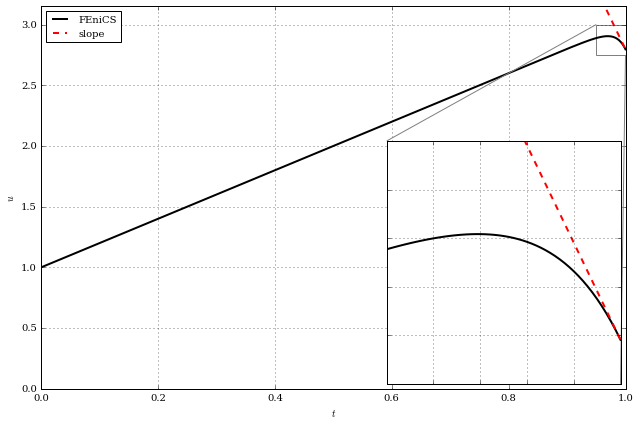

In [15]:
#===============================================================================
# finite-element solution :

from fenics import *

mesh = IntervalMesh(1000,0,1)
Q    = FunctionSpace(mesh, 'CG', 1)
x    = SpatialCoordinate(mesh)[0]
t    = mesh.coordinates()[:,0]
n    = FacetNormal(mesh)

v    = TestFunction(Q)
u    = Function(Q)
du   = TrialFunction(Q)

eps  = 0.05

dur  = -10.0

r    = - eps * u.dx(0) * v.dx(0) * dx \
       + eps * dur * v * ds \
       - (2*x + 1) * u.dx(0) * v * dx  \
       + 2 * u * v * dx \

def left(x, on_boundary):
  return on_boundary and x[0] == 0.0

def right(x, on_boundary):
  return on_boundary and x[0] == 1.0

leftBC  = DirichletBC(Q, 1.0, left)
rightBC = DirichletBC(Q, 0.0, right)

bcs = [leftBC]
J   = derivative(r, u, du)

solve(r == 0, u, bcs=bcs, J=J)

uf = u.vector().array()[::-1]

#===============================================================================
# plot :

from pylab import *
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

sf  = dur*(t - t[-1]) + uf[-1]

ax.set_xlim(0.0, 1.00)
ax.set_ylim(0.0, 3.15)

ax.plot(t, uf, 'k',   lw=2.0, label=r"FEniCS")
ax.plot(t, sf, 'r--', lw=2.0, label=r"slope")

axins = zoomed_inset_axes(ax, 8, loc=4)
axins.set_xlim(0.95, 1.00)
axins.set_ylim(2.75, 3.00)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
xticks(visible=False)
yticks(visible=False)

axins.plot(t, uf, 'k',   lw=2.0, label=r"FEniCS")
axins.plot(t, sf, 'r--', lw=2.0, label=r"slope")
axins.grid()

ax.legend(loc='upper left')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$u$')
ax.grid()

tight_layout()

savefig("images/intro/1D_BVP_2.pdf")
show()

## Variational integration

An interesting problem that is easily solved with the finite element method is the integration of a function $u$ over domain $\Omega = [a,b]$,

$$
\begin{align*}
  v(x) &= \int_a^x u(s) ds = U(x) - U(a),
\end{align*}
$$

where $U$ is an anti-derivative of $u$ such that

$$
\begin{align*}
  \frac{dU}{dx} = u(x).
\end{align*}
$$

Because the integral is from $a$ to $x$, we take $U(a) = 0$; hence $v(x) = U(x)$ and we have a first-order differential equation

$$
\begin{align*}
  \frac{dv}{dx} = u(x), \hspace{5mm} v(a) = 0.
\end{align*}
$$

Next, because $v$ is the function for which we seek, we make it the trial function over the finite element space, multiply by the test function $\phi$, and integrate over the domain $\Omega$,

$$
\begin{align*}
  \int_{\Omega} \frac{dv}{dx} \phi d\Omega &= \int_{\Omega} u \phi d\Omega \\
  a(v,\phi) &= L(\phi),
\end{align*}
$$

the weak form.  This linear problem is solved below.

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


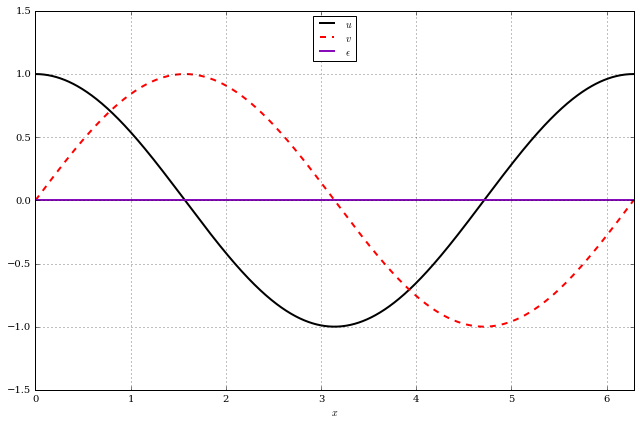

In [17]:
from fenics import *

mesh = IntervalMesh(1000,0,2*pi)
Q    = FunctionSpace(mesh, 'CG', 1)
x    = SpatialCoordinate(mesh)[0]
t    = mesh.coordinates()[:,0]

u    = interpolate(Expression('cos(x[0])'), Q)
s    = interpolate(Expression('sin(x[0])'), Q)
v    = TrialFunction(Q)
phi  = TestFunction(Q)

def left(x, on_boundary):
  return on_boundary and abs(x[0]) < 1e-14

# integral is zero on the left
bcs = DirichletBC(Q, 0.0, left)

a      = v.dx(0) * phi * dx
L      = u * phi * dx
v      = Function(Q)
solve(a == L, v, bcs)

uf = u.vector().array()[::-1]
vf = v.vector().array()[::-1]
sf = s.vector().array()[::-1]

r  = vf - sf

#===============================================================================
# plot :

from pylab import *
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

ax.plot(t, uf, 'k',       lw=2.0, label=r"$u$")
ax.plot(t, vf, 'r--',     lw=2.0, label=r"$v$")
ax.plot(t, r,  '#880cbc', lw=2.0, label=r"$\epsilon$")

ax.set_xlim(0,2*pi)
ax.legend(loc='upper center')
ax.set_xlabel(r'$x$')
ax.grid()

tight_layout()
savefig("images/intro/1D_BVP_3.pdf")
show()

## Functional derivatives

It is often important to compute the derivative of one function with respect to another, say

$$
\begin{align*}
  w(x) = \frac{du}{dv} = \frac{du}{dx} \frac{dx}{dv} = \frac{du}{dx} \left( \frac{dv}{dx} \right)^{-1},
\end{align*}
$$

for continuous functions $u$ and $v$ over the domain $\Omega = [a,b]$.  The weak form for this problem with trial function $w$, test function $\phi$, is simply

$$
\begin{align*}
  \int_{\Omega} w \phi d\Omega &= \int_{\Omega} \frac{du}{dx} \left( \frac{dv}{dx} \right)^{-1} \phi d\Omega \\
  a(w,\phi) &= L(\phi),
\end{align*}
$$

with no restrictions on the boundary -- we can get away with this because both $u$ and $v$ are known *a priori* -- hence their derivatives may be computed directly and thus estimated throughout the entire domain.  Solving problems of this type are referred to in the literature as *projections*, due to the fact that they simply project a known solution onto the finite element basis.

Two examples are provided below.


DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


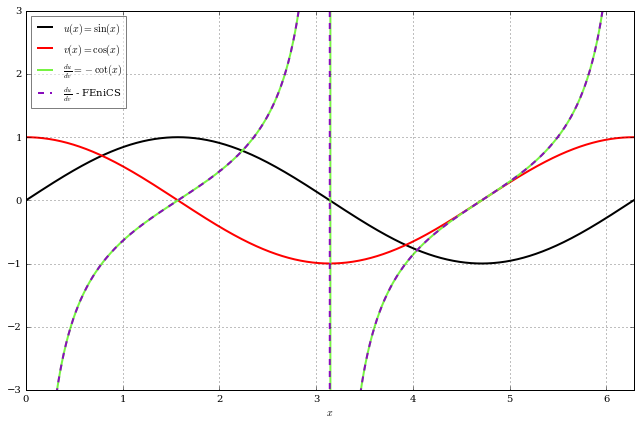

In [18]:
from pylab  import *
from fenics import *

xmin = 0
xmax = 2*pi
mesh = IntervalMesh(1000, xmin, xmax)
Q    = FunctionSpace(mesh, 'CG', 1)

u    = interpolate(Expression('sin(x[0])'),  Q)
v    = interpolate(Expression('cos(x[0])'),  Q)
dudv = interpolate(Expression('-cos(x[0])/sin(x[0])'), Q)

dudv_1 = u.dx(0) * 1/v.dx(0)

x    = mesh.coordinates()[:,0][::-1]
u_v  = u.vector().array()
v_v  = v.vector().array()
d_va = dudv.vector().array()
d_v1 = project(dudv_1).vector().array()

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig  = figure(figsize=(9,6))
ax   = fig.add_subplot(111)

purp = '#880cbc'
grun = '#77f343'

ax.plot(x, u_v,  'k',   lw=2.0, label=r'$u(x) = \sin(x)$')
ax.plot(x, v_v,  'r',   lw=2.0, label=r'$v(x) = \cos(x)$')

ax.plot(x, d_va, color=grun, ls='-',  lw=2.0, 
        label=r'$\frac{du}{dv} = -\cot(x)$')
ax.plot(x, d_v1, color=purp, ls='--', lw=2.0,
        label=r'$\frac{du}{dv}$ - FEniCS')

ax.grid()
ax.set_xlabel(r'$x$')
ax.set_ylim([-3,3])
ax.set_xlim([xmin, xmax])
leg = ax.legend(loc='upper left')
leg.get_frame().set_alpha(0.5)
tight_layout()
savefig('images/intro/1D_dir_dir_1.pdf')
show()

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


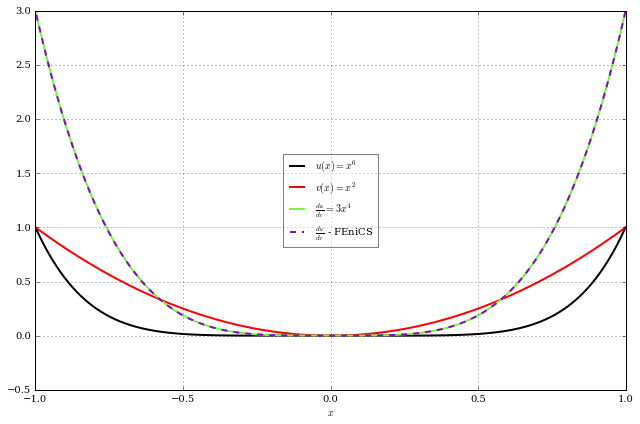

In [19]:
from pylab  import *
from fenics import *

mesh = IntervalMesh(1000,-1,1)
Q    = FunctionSpace(mesh, 'CG', 1)

u    = interpolate(Expression('pow(x[0], 6)'),   Q)
v    = interpolate(Expression('pow(x[0], 2)'),   Q)
dudv = interpolate(Expression('3*pow(x[0], 4)'), Q)

dudv_1 = u.dx(0) * 1/v.dx(0)


x    = mesh.coordinates()[:,0][::-1]
u_v  = u.vector().array()
v_v  = v.vector().array()
d_va = dudv.vector().array()
d_v1 = project(dudv_1).vector().array()

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

fig  = figure(figsize=(9,6))
ax   = fig.add_subplot(111)

purp = '#880cbc'
grun = '#77f343'

ax.plot(x, u_v,  'k',   lw=2.0, label=r'$u(x)=x^6$')
ax.plot(x, v_v,  'r',   lw=2.0, label=r'$v(x)=x^2$')

ax.plot(x, d_va, color=grun, ls='-',  lw=2.0, 
        label=r'$\frac{du}{dv} = 3x^4$')
ax.plot(x, d_v1, color=purp, ls='--', lw=2.0,
        label=r'$\frac{du}{dv}$ - FEniCS')

ax.grid()
ax.set_xlabel(r'$x$')
leg = ax.legend(loc='center')
leg.get_frame().set_alpha(0.5)
tight_layout()
savefig('images/intro/1D_dir_dir_2.pdf')
show()

## A nonlinear problem

Suppose we would like to minimize the time for a boat to cross a river.  The time for this boat to cross, when steered directly perpendicular to the river's parallel banks is given by

$$
\begin{align*}
  T(y) &= \int_0^T dt = \int_0^S \frac{dt}{ds} ds = \int_0^S \frac{1}{\Vert \mathbf{u}\Vert} ds \\
  T(y) &= \int_0^{\ell} \frac{\sqrt{1 + (y')^2}}{\Vert \mathbf{u} \Vert} dx \\
  T(y) &= \int_0^{\ell} \frac{\sqrt{1 + (y')^2}}{\sqrt{v^2 + u^2}} dx = \int_0^{\ell} L(x,y') dx,
\end{align*}
$$

where $S$ is the length of the boat's path; $\mathbf{u}$ is the velocity of the boat with components river current speed $v(x)$ and boat speed $u$ in the $x$ direction as a result of its motor; and $\ell$ is the width of the river.  For *Lagrangian* $L$, we compute the first variation of $T$,

$$
\begin{align*}
  \delta T(y,\phi) &= \frac{d}{d\epsilon} \int_0^{\ell} L(x, y + \epsilon \phi, y' + \epsilon \phi') dx \Bigg|_{\epsilon = 0} \\
                   &= \int_0^{\ell} \left( L_y \phi + L_{y'} \phi' \right) dx \\
                   &= \int_0^{\ell} \left( L_y - \frac{d}{dx} L_{y'} \right) \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell} \\
                   &= \int_0^{\ell} \left( L_y - \left[ L_{y'x} + L_{y'y} y' + L_{y'y'} y'' \right] \right) \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell}.
\end{align*}
$$

Evaluating each individual term, we find

$$
\begin{align*}
  L_y          &= 0 \\
  L_{y'}(y')   &= \frac{y' \left(1 + (y')^2\right)^{-1/2}}{\sqrt{v^2 + u^2}} \\
  L_{y'x}(y')  &= \frac{\left(2(y')^2 + 1\right) y''}{\sqrt{u^2 + v^2} \sqrt{1 + (y')^2}} \\
  L_{y'y}      &= 0 \\
  L_{y'y'}(y') &= \frac{1}{\sqrt{u^2 + v^2} \sqrt{1 + (y')^2}} \left( 1 - \frac{(y')^2}{\left(1 + (y')^2\right)^3} \right).
\end{align*}
$$

In order to find the minimal time for the boat to cross, we need the first variation of $T$ to be equal to zero, that is,

$$
\begin{align*}
  \delta T(y,\phi) = 0 &= \int_0^{\ell} \left( L_y - \left[ L_{y'x} + L_{y'y} y' + L_{y'y'} y'' \right] \right) \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell} \\
  0 &= - \int_0^{\ell} \left( L_{y'x} + L_{y'y'} y'' \right) \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell}.
\end{align*}
$$

First, if we define

$$
\begin{align*}
  M &= \frac{L_{y'x}}{y''},
\end{align*}
$$

we can rewrite this and integrate by parts again,

$$
\begin{align*}
  0 &= - \int_0^{\ell} \left( M y'' + L_{y'y'} y'' \right) \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell} \\
    &= - \int_0^{\ell} \left( M + L_{y'y'} \right) y'' \phi dx + L_{y'} \phi \Big|_{x=0}^{x=\ell} \\
    &= \int_0^{\ell} \left( M + L_{y'y'} \right) y' \phi' dx - \left[ M + L_{y'y'} \right] y' \phi \Big|_{x=0}^{x=\ell} + L_{y'} \phi \Big|_{x=0}^{x=\ell}.
\end{align*}
$$

If we then set the left essential boundary condition to $y(0) = 0$, and the right natural boundary condition to be the trajectory of the boat at the opposite bank given by

$$y'(\ell) = g = \frac{v(\ell)}{u},$$

we have

$$
\begin{align*}
  0 &= \int_0^{\ell} \left( M(y') + L_{y'y'}(y') \right) y' \phi' dx - \left[ M(g) + L_{y'y'}(g) \right] g \phi \Big|_{x=\ell} + L_{y'}(g) \phi \Big|_{x=\ell}.
\end{align*}
$$

The next section demonstrates a method for minimizing the right-hand side of this equation.

### Newton-Raphson method

To solve our non-linear problem, we use the *Newton-Raphson* method.  This method linearizes the problem by first assuming an initial guess of the minimizer, $y_n$, of the function we wish to minimize, $\mathcal{T}(y) = \delta T(y)$, and then uses the $t$-intercept of the tangent line to this guess as a subsequent guess, $y_{n+1}$.  This procedure is repeated until either the absolute value of $\mathcal{T}(y_{n+1})$ is below a desired *absolute tolerance* or the relative change of $\mathcal{T}$ between guesses $y_n$ and $y_{n+1}$ is below a desired *relative tolerance*.

#### Procedure

First, the equation for the tangent line of our time functional for a guess $y_n$ is

$$
\begin{align*}
  t &= \mathcal{T}'(y_n) (y - y_n) + \mathcal{T}(y_n),
\end{align*}
$$

with $t$-intercept given by

$$
\begin{align*}
  0 &= \mathcal{T}'(y_n) (y - y_n) + \mathcal{T}(y_n).
\end{align*}
$$

If we now solve this equation for $y$, we have a subsequent minimizer guess

$$
\begin{align*}
  y_{n+1} &= y_n - \frac{\mathcal{T}(y_n)}{\mathcal{T}'(y_n)}.
\end{align*}
$$

Provided that the curve $\mathcal{T}$ is relatively smooth, and that we can calculate $\mathcal{T}'(y_n)$, this describes an iterative procedure for calculating the path for the boat which crosses the river in minimum time.




DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


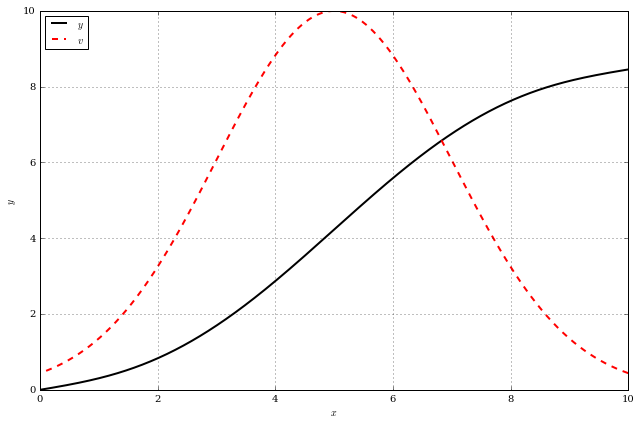

In [26]:
from fenics import *

mesh = IntervalMesh(1000,0,10)
Q    = FunctionSpace(mesh, 'CG', 1)

v    = interpolate(Expression('10*exp(-0.5*pow(x[0] - 5.0, 2)/pow(2,2))'), Q)
u    = 1.0
g    = v / u

y    = Function(Q)
dy   = TrialFunction(Q)
phi  = TestFunction(Q)

def left(x, on_boundary):
  return on_boundary and abs(x[0]) < 1e-14

# boat starts at y=0 :
bc = DirichletBC(Q, 0.0, left)

def Lp(yp):
  Lp  = yp * (1 + yp**2)**(-1/2.) / sqrt(v**2 + u**2)
  return Lp

def Lpp(yp):
  Lpp = 1/(sqrt(1 + yp**2) * sqrt(v**2 + u**2)) * (1 - yp**2 / (1 + yp**2)**3)
  return Lpp

def M(yp):
  q = (2*yp**2 + 1) / (sqrt(u**2 + v**2) * sqrt(yp**2 + 1))
  return q

F  = + (Lpp(y.dx(0)) + M(y.dx(0))) * y.dx(0) * phi.dx(0) * dx \
     - (M(g) + Lpp(g))* g * phi * ds \
     + Lp(g) * phi * ds

J  = derivative(F, y, dy)

solve(F == 0, y, bc, J=J)

#===============================================================================
# plot :

from pylab import *

mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

x  = mesh.coordinates()[:,0][::-1]
vf = v.vector().array()
yf = y.vector().array()

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

ax.plot(x, yf, 'k',   lw=2.0, label=r"$y$")
ax.plot(x, vf, 'r--', lw=2.0, label=r"$v$")

#ax.set_xlim(0,2*pi)
ax.legend(loc='upper left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.grid()

tight_layout()
savefig("images/intro/river_cross.pdf")
show()

## Fourier-series Eigenvalue problem

The 1D initial-boundary-value problem for the heat equation with heat conductivity $k$ is

$$
\begin{align*}
  \frac{\partial u}{\partial t} &= \frac{\partial}{\partial x} \left[ k \frac{\partial u}{\partial x} \right], &&0 < x < \ell,\ t > 0, \\
  u(0,t) &= u(\ell,t) = 0, &&t > 0, \\
  u(x,0) &= f(x),       &&0 < x < \ell.
\end{align*}
$$

We examine this problem in the context of exact and approximate Eigenvalues and Eigenvectors in the following sections.

### Fourier series solution

The solution of $u$ can be found by the method of separation of variables, developed by Joseph Fourier in 1822.  Using this method, we first assume a solution of the form $u(x,t) = X(x)T(t)$, so that our equation becomes

$$
\begin{align*}
  X(x)\frac{\partial T(t)}{\partial t}  &= \frac{\partial}{\partial x} \left[ k \frac{\partial X(x)}{\partial x} \right] T(t) \\ 
  \frac{1}{k T(t)}\frac{\partial T(t)}{\partial t}  &= \frac{1}{X(x)} \frac{\partial}{\partial x} \left[ \frac{\partial X(x)}{\partial x} \right], 
\end{align*}
$$

For two functions with two different independent variables to be equal, they must both equal to the same constant $-\lambda$, $\lambda > 0$,

$$
\begin{align*}
  \frac{1}{k T(t)}\frac{\partial T(t)}{\partial t} = \frac{1}{X(x)} \frac{\partial}{\partial x} \left[ \frac{\partial X(x)}{\partial x} \right] = - \lambda, 
\end{align*}
$$

so

$$
\begin{align*}
  \frac{\partial T(t)}{\partial t} + \lambda k T(t) = 0, \hspace{10mm} \frac{\partial^2 X(x)}{\partial x^2} + \lambda X(x) = 0.
\end{align*}
$$

The solution to the first-order $T$ equation is

$$
\begin{align*}
  T(t) = Ae^{-\lambda k t},
\end{align*}
$$

while the solution to the second-order $X$ equation is

$$
\begin{align*}
  X(x) = B_1 \sin\left( \sqrt{\lambda} x \right) + B_2 \cos\left( \sqrt{\lambda} x \right),
\end{align*}
$$

for some coefficients $A$, $B_1$, and $B_2$ where $B_1$ and $B_2$ cannot both be zero since then only the trivial solution exists.  Applying the boundary conditions $X(0) = X(\ell) = 0$ to the $X$ equation,

$$
\begin{align*}
  X(0) &= B_2 = 0, \\
  X(\ell) &= B_1 \sin\left( \sqrt{\lambda} \ell \right) = 0 &&\\
  \implies \sqrt{\lambda} \ell &= n\pi, &&n = 1,2,3,\dots \\
  \implies \lambda &= \left( \frac{n \pi}{\ell} \right)^2, &&n = 1,2,3,\dots
\end{align*}
$$

Therefore, we have found our Eigenfunctions and Eigenvalues for the steady-state problem,

$$
\begin{align*}
  X_n(x) = \sin\left( \sqrt{\lambda_n} x \right) \hspace{5mm}
  \lambda_n = \left( \frac{n \pi}{\ell} \right)^2, &&n = 1,2,3,\dots
\end{align*}
$$

By the Superposition Principle, any linear combination of solutions is again a solution, and we have the solution to the transient problem,

$$
\begin{align*}
  u(x,t) &= \sum_{n=1}^{\infty} c_n X_n(x) T_n(t) \\
         &= \sum_{n=1}^{\infty} c_n \sin\left( \sqrt{\lambda_n} x \right) e^{-\lambda_n k t},
\end{align*}
$$

where $c_n = A B_1$ and $\lambda_n = \left( \frac{n \pi}{\ell} \right)^2$.  The coefficient $c_n$ may be discovered by inspecting the initial condition $u(x,0) = f(x)$,

$$
\begin{align*}
  u(x,0) &= \sum_{n=1}^{\infty} c_n \sin\left( \sqrt{\lambda_n} x \right) = f(x),
\end{align*}
$$

which hints that if we multiply both sides by the function $\sin(m\pi x/\ell)$ for arbitrary $m$ and utilize the fact that

$$
\begin{align*}
  \int_{0}^{\ell} \sin\left(\frac{n\pi x}{\ell}\right) \sin\left(\frac{m\pi x}{\ell}\right) dx =
  \begin{cases}
    0,      & n \neq m, \\
    \ell/2, & n = m,
  \end{cases}
\end{align*}
$$

we have

$$
\begin{align*}
  \sum_{n=1}^{\infty} c_n \sin\left( \frac{n\pi x}{\ell} \right) \sin\left(\frac{m\pi x}{\ell} \right) &= f(x) \sin\left( \frac{m\pi x}{\ell} \right) \\
  \int_{0}^{\ell} \sum_{n=1}^{\infty} c_n \sin\left( \frac{n\pi x}{\ell} \right) \sin\left(\frac{m\pi x}{\ell} \right) dx &= \int_{0}^{\ell} f(x) \sin\left( \frac{m\pi x}{\ell} \right) dx \\
  \sum_{n=1}^{\infty} c_n \int_{0}^{\ell} \sin\left( \frac{n\pi x}{\ell} \right) \sin\left(\frac{m\pi x}{\ell} \right) dx &= \int_{0}^{\ell} f(x) \sin\left( \frac{m\pi x}{\ell} \right) dx \\
  c_m \int_{0}^{\ell} \sin\left( \frac{m\pi x}{\ell} \right) \sin\left(\frac{m\pi x}{\ell} \right) dx &= \int_{0}^{\ell} f(x) \sin\left( \frac{m\pi x}{\ell} \right) dx \\
  c_m \left( \frac{\ell}{2} \right) &= \int_{0}^{\ell} f(x) \sin\left( \frac{m\pi x}{\ell} \right) dx,
\end{align*}
$$

and finally, replacing the dummy variable $m$ with $n$,

$$
\begin{align*}
  c_n = \frac{2}{\ell} \int_{0}^{\ell} f(x) \sin\left( \frac{n\pi x}{\ell} \right) dx.
\end{align*}
$$

### Finite element approximation

The Eigenvalue problem

$$
\begin{align*}
  \frac{\partial^2 X(x)}{\partial x^2} + \lambda X(x) = 0, \hspace{5mm} X(0) = X(\ell) = 0
\end{align*}
$$

has associated weak form with test function $\phi$

$$
\begin{align*}
  \int_0^{\ell} \left[ \frac{\partial^2 X}{\partial x^2} + \lambda X \right]\phi dx &= 0 \\
  \int_0^{\ell} \left[ \lambda X \phi - \frac{\partial X}{\partial x} \frac{\partial \phi}{\partial x} \right] dx - \frac{\partial X}{\partial x} \phi(0) + \frac{\partial X}{\partial x} \phi(\ell) &= 0 \\
  \int_0^{\ell} \left[ \lambda X \phi - \frac{\partial X}{\partial x} \frac{\partial \phi}{\partial x} \right] dx &= 0,
\end{align*}
$$

where we have used the fact that the boundary conditions are of type Dirichlet and can hence ignore the boundary flux terms.  If we substitute a finite element approximation of the form

$$
\begin{align*}
  X_e = \sum_{j=1}^n u_j^e \psi_j^e(x),
\end{align*}
$$

where $u_j^e$ is the $j$th nodal value of $X$ at element $e$ and $\psi_j^e(x)$ is the element's associated Lagrange interpolation function, into the equation, we have the finite element model

$$
\begin{align*}
  \left[ \lambda M_{ij}^e - K_{ij}^e \right] \cdot u_j^e = \mathbf{0},
\end{align*}
$$

where

$$
\begin{align*}
  K_{ij}^e = \int_0^{\ell} \frac{\partial \psi_i^e}{\partial x} \frac{\partial \psi_j^e}{\partial x} dx, \hspace{10mm} M_{ij}^e = \int_0^{\ell} \psi_i^e \psi_j^e dx.
\end{align*}
$$

Expanding the element equation tensors, we have

$$
\begin{align*}
  \left( \frac{\lambda h_e}{6} \begin{bmatrix}
                                 2 & 1 \\
                                 1 & 2
                               \end{bmatrix}
         - \frac{1}{h_e} \begin{bmatrix}
                            1 & -1 \\
                           -1 & 1
                         \end{bmatrix}
  \right) \cdot
  \begin{bmatrix}
    u_1^e \\
    u_2^e\
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix}
\end{align*}
$$

which after assembling over the entire three-element function space with $h_e = 1/3$ becomes

$$
\begin{align*}
  \left( \frac{\lambda}{18} \begin{bmatrix}
                              2 & 1 & 0 & 0 \\
                              1 & 4 & 1 & 0 \\
                              0 & 1 & 4 & 1 \\
                              0 & 0 & 1 & 2 \\
                            \end{bmatrix}
         - 3 \begin{bmatrix}
                1 & -1 &  0 &  0 \\
               -1 &  2 & -1 &  0 \\
                0 & -1 &  2 & -1 \\
                0 &  0 & -1 &  1
             \end{bmatrix}
  \right) \cdot
  \begin{bmatrix}
    X_1 \\
    X_2 \\
    X_3 \\
    X_4 \\
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0
  \end{bmatrix}.
\end{align*}
$$

The boundary conditions $X(0) = X(\ell) = 0$ imply that $X_1 = X_4 = 0$ and thus this system reduces to a system of two linear equations,

$$
\begin{align*}
  \left( \lambda \frac{4}{18} - 6 \right) X_2 + \left( \lambda\frac{1}{18} + 3 \right) X_3 &= 0 \\
  \left( \lambda \frac{1}{18} + 3 \right) X_2 + \left( \lambda\frac{4}{18} - 6 \right) X_3 &= 0,
\end{align*}
$$

or

$$
\begin{align*}
  \begin{bmatrix}
    \left( \lambda \frac{2}{9} - 6 \right) & \left( \lambda \frac{1}{18} + 3 \right) \\
    \left( \lambda \frac{1}{18} + 3 \right) & \left( \lambda \frac{2}{9} - 6 \right) \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    X_2 \\
    X_3 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix}.
\end{align*}
$$

The characteristic polynomial is found by setting the determinant of the coefficient matrix equal to zero,

$$
\begin{align*}
  \begin{vmatrix}
    \left( \lambda \frac{2}{9} - 6 \right) & \left( \lambda \frac{1}{18} + 3 \right) \\
    \left( \lambda \frac{1}{18} + 3 \right) & \left( \lambda \frac{2}{9} - 6 \right) \\
  \end{vmatrix} &= 0 \\
  \left( \lambda \frac{2}{9} - 6 \right) \left( \lambda \frac{2}{9} - 6 \right) - \left( \lambda \frac{1}{18} + 3 \right) \left( \lambda \frac{1}{18} + 3 \right) &= 0 \\
  \left( \lambda^2 \frac{4}{81} - \lambda \frac{24}{9} + 36 \right) - \left( \lambda^2 \frac{1}{324} + \lambda \frac{6}{18} + 9 \right) &= 0 \\
  \left( \frac{4}{81} - \frac{1}{324} \right) \lambda^2 - \left( \frac{24}{9} + \frac{6}{18} \right) \lambda + 27 &= 0 \\
  \left( \frac{5}{108} \right) \lambda^2 - 3 \lambda + 27 &= 0,
\end{align*}
$$

with roots

$$
\begin{align*}
  \lambda &= \frac{3 \pm \sqrt{9 - 108\left( \frac{5}{108} \right)}}{2\left( \frac{5}{108} \right)} = \frac{162}{5} \pm \frac{108}{5},
\end{align*}
$$

providing the two Eigenvalue approximations $\widetilde{\lambda}_1 = 54/5 = 10.8$ and $\widetilde{\lambda}_2 = 54$.  The Eigenvectors may then be derived from the linear systems

$$
\begin{align*}
  \begin{cases}
  \begin{bmatrix}
    \left( \widetilde{\lambda}_1 \frac{2}{9} - 6 \right) & \left( \widetilde{\lambda}_1 \frac{1}{18} + 3 \right) \\
    \left( \widetilde{\lambda}_1 \frac{1}{18} + 3 \right) & \left( \widetilde{\lambda}_1 \frac{2}{9} - 6 \right) \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    X_2^1 \\
    X_3^1 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix} \\
  \begin{bmatrix}
    \left( \widetilde{\lambda}_2 \frac{2}{9} - 6 \right) & \left( \widetilde{\lambda}_2 \frac{1}{18} + 3 \right) \\
    \left( \widetilde{\lambda}_2 \frac{1}{18} + 3 \right) & \left( \widetilde{\lambda}_2 \frac{2}{9} - 6 \right) \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    X_2^2 \\
    X_3^2 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix}
  \end{cases}&\\
  \begin{cases}
  \begin{bmatrix}
    -\frac{18}{5} &  \frac{18}{5} \\
     \frac{18}{5} & -\frac{18}{5} \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    X_2^1 \\
    X_3^1 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix} \\
  \begin{bmatrix}
    6 & 6 \\
    6 & 6 \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    X_2^2 \\
    X_3^2 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\
    0
  \end{bmatrix}
  \end{cases}&
\end{align*}
$$

providing $X^1 = \begin{bmatrix} 1 & 1 \end{bmatrix}^\intercal$ and $X^2 = \begin{bmatrix} 1 & -1 \end{bmatrix}^\intercal$.

Using these approximate Eigenvectors and Eigenvalues, we can create an approximate three-element transient solution

$$
\begin{align*}
  \widetilde{u}(x,t) &= \sum_{e=1}^n X^e(x) T^e(t, \widetilde{\lambda}_e) \\
  &= \sum_{e=1}^3 \left[ \sum_{j=1}^2 X^e_j \psi_j^e(x) \right] c_e e^{-\widetilde{\lambda}_e k t},
\end{align*}
$$

where $c_e = c_n$ is the same coefficients of orthogonality from the Fourier series approximation at element $e = n$, $n=1,2,3$, and $X^e$ is the Eigenvector associated with Eigenvalue $\widetilde{\lambda}_e$.  The solutions to both the Fourier and finite element approximations are presented below.


DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


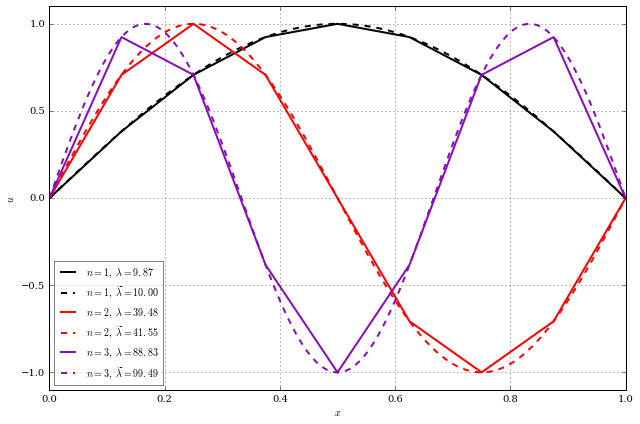

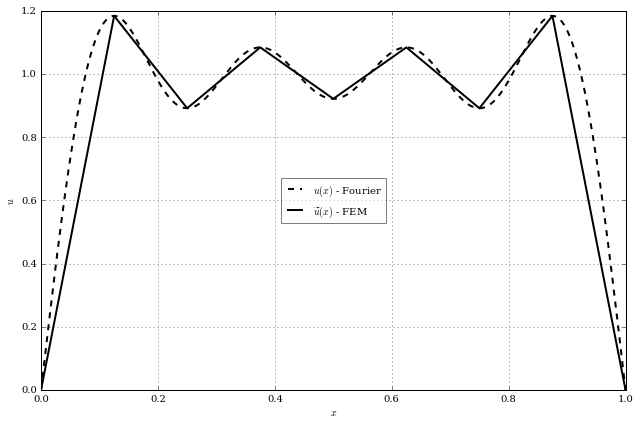

In [27]:
from pylab  import *
from dolfin import *
import sympy as sp

n    = 8
mesh = IntervalMesh(n, 0, 1)
Q    = FunctionSpace(mesh, 'CG', 1)
phi  = TestFunction(Q)
u    = TrialFunction(Q)

def left(x, on_boundary):
  tol = 1e-14
  return on_boundary and abs(x[0]) < tol

def right(x, on_boundary):
  tol = 1e-14
  return on_boundary and abs(x[0] - 1) < tol

gamma_l = DirichletBC(Q, 0.0, left)
gamma_r = DirichletBC(Q, 0.0, right)

k = inner(grad(phi), grad(u)) * dx
m = phi * u * dx

K = PETScMatrix()
M = PETScMatrix()

K = assemble(k, tensor=K)
M = assemble(m, tensor=M)

gamma_r.apply(K)
gamma_l.apply(K)
gamma_r.apply(M)
gamma_l.apply(M)

eigensolver = SLEPcEigenSolver(K,M)
eigensolver.parameters['solver'] = 'lapack'
eigensolver.solve()


mpl.rcParams['font.family']     = 'serif'
mpl.rcParams['legend.fontsize'] = 'medium'

x     = sp.symbols('x')
xm    = mesh.coordinates()[:,0][::-1]
xf    = linspace(0,1,1000)
col   = ['k', 'r', '#880cbc']
lam_m = []
lam_f = []
Am    = []
Af    = []
Av    = []
cn    = []

for i in range(n-1):
  ep     = eigensolver.get_eigenpair(n-2-i)
  Afi    = zeros(n)
  lam_fi = ((i+1) * pi)**2
  Afi    = np.sin(np.sqrt(lam_fi) * xf)
  cni    = 2 * sp.integrate(sp.sin((i+1)*pi*x), (x,0,1))
  lam_m.append(ep[0])
  lam_f.append(lam_fi)
  e_v = ep[2].array()
  if i == 1:
    e_v = -e_v
  Am.append(e_v)
  Af.append(Afi)
  cn.append(cni)

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

for i, (am,af,lf,lm,c) in enumerate(zip(Am, Af, lam_f, lam_m, col)):
  lbl = r'$n=%i,\ \lambda=%.2f$' % (i+1, lf)
  ax.plot(xm, am, c, ls='-', lw=2.0, label=lbl)
  lbl = r'$n=%i,\ \widetilde{\lambda}=%.2f$' % (i+1, lm)
  ax.plot(xf, af, c, ls='--',lw=2.0, label=lbl)

leg = ax.legend(loc='lower left')
leg.get_frame().set_alpha(0.5)
ax.set_ylim([-1.1,1.1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.grid()
tight_layout()
savefig('images/intro/eigenvectors.pdf')
show()

cn = array(cn, dtype='d')
af = zeros(1000)
am = zeros(n+1)
for i in range(n-1):
  af += cn[i]*Af[i]
  am += cn[i]*Am[i]

fig = figure(figsize=(9,6))
ax  = fig.add_subplot(111)

ax.plot(xf, af, 'k--', lw=2.0, label=r'$u(x)$ - Fourier')
ax.plot(xm, am, 'k-',  lw=2.0, label=r'$\widetilde{u}(x)$ - FEM')

leg = ax.legend(loc='center')
leg.get_frame().set_alpha(0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.grid()
tight_layout()
savefig('images/intro/eigen_solution.pdf')
show()

## 2D Poisson equation

Our Poisson equation to be solved over the domain $\Omega = [0,1] \times [0,1]$ is

$$
\begin{align*}
  -\nabla^2 u &= f &&\\
  f &= 10 \sin\left(\frac{2\pi x}{L}\right) \sin\left(\frac{2\pi y}{L}\right) &&\\
  \nabla u \cdot \mathbf{n} &= g = \sin(x) &&\text{ on } \Gamma_N, \Gamma_S \\
  u &= 1 &&\text{ on } \Gamma_E, \Gamma_W,
\end{align*}
$$

where $\Gamma_N$, $\Gamma_S$, $\Gamma_E$, and $\Gamma_W$ are the North, South, East and West boundaries, $L$ is the length of the square side, and $\mathbf{n}$ is the outward normal to the boundary $\Gamma$.  The associated weak form is

$$
\begin{align*}
  -\int_{\Omega} \nabla^2 u \phi d\Omega &= \int_{\Omega} f \phi d\Omega \\
  \int_{\Omega} \nabla u \cdot \nabla \phi d\Omega - \int_{\Gamma} \phi \nabla u \cdot \mathbf{n} d\Gamma &= \int_{\Omega} f \phi d\Omega \\
  \int_{\Omega} \nabla u \cdot \nabla \phi d\Omega - \int_{\Gamma_N} \phi g d\Gamma_N - \int_{\Gamma_S} \phi g d\Gamma_S &= \int_{\Omega} f \phi d\Omega,
\end{align*}
$$

which can be stated in bilinear form

$$
\begin{align*}
  a(u,\phi) &= L(\phi),
\end{align*}
$$

where

$$
\begin{align*}
  L(\phi) &= \int_{\Gamma_N} \phi g d\Gamma_N + \int_{\Gamma_S} \phi g d\Gamma_S + \int_{\Omega} f \phi d\Omega, \\
  a(u,\phi) &= \int_{\Omega} \nabla u \cdot \nabla \phi d\Omega.
\end{align*}
$$

This is as far as we need to go in order to solve with FEniCS, as demonstrated below.


DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


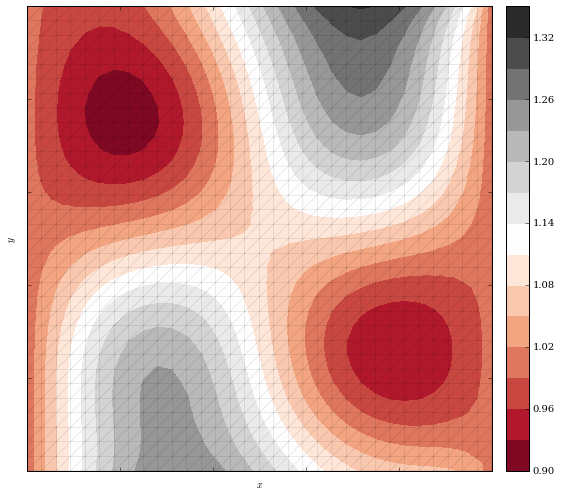

In [21]:
from dolfin import *

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V    = FunctionSpace(mesh, "Lagrange", 1)
ff   = FacetFunction('size_t', mesh, 0)

# iterate through the facets and mark each if on a boundary :
#
# 1 - West
# 2 - East
# 3 - North
# 4 - South
for f in facets(mesh):
  n       = f.normal()    # unit normal vector to facet f
  tol     = DOLFIN_EPS
  if   n.x() <= -tol and n.y() <   tol and f.exterior():
    ff[f] = 1
  elif n.x() >=  tol and n.y() <   tol and f.exterior():
    ff[f] = 2
  elif n.x() <   tol and n.y() >=  tol and f.exterior():
    ff[f] = 3
  elif n.x() <   tol and n.y() <= -tol and f.exterior():
    ff[f] = 4

ds = Measure('ds')[ff]
dN = ds(3)
dS = ds(4)
dE = ds(2)
dW = ds(1)

# Define boundary condition
u0  = Constant(1.0)
bcE = DirichletBC(V, u0, ff, 2)
bcW = DirichletBC(V, u0, ff, 1)

bc  = [bcE, bcW]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10 * sin(2*pi*x[0]) * sin(2*pi*x[1])")
g = Expression("sin(x[0])")
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*(dN + dS)

# Compute solution
u = Function(V)
solve(a == L, u, bc)

v = u.compute_vertex_values(mesh)
x = mesh.coordinates()[:,0]
y = mesh.coordinates()[:,1]
t = mesh.cells()

from pylab  import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = figure(figsize=(8,7))
ax  = fig.add_subplot(111)

cm  = get_cmap('RdGy')
c = ax.tricontourf(x, y, t, v, 15, cmap=cm)
p = ax.triplot(x, y, t, '-', color='k', lw=0.2, alpha=0.4)
ax.axis('equal')
ax.set_xlim([x.min(), x.max()])
ax.set_ylim([y.min(), y.max()])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticklabels([])
ax.set_yticklabels([])
  
divider = make_axes_locatable(gca())
cax  = divider.append_axes('right', "5%", pad="3%")
cbar = colorbar(c, cax=cax) 
tight_layout()
savefig('images/intro/2Dpoisson.pdf')
show()

## 2D Stoke's equations

The Stokes equations for incompressible fluid is

$$
\begin{align*}
  -\nabla \cdot \sigma &= \mathbf{f} \\
  \nabla \cdot \mathbf{u} &= 0.
\end{align*}
$$

where $\sigma$ is the Cauchy stress tensor defined as $\sigma = 2\eta \dot{\epsilon} - pI$; $\eta$ viscosity, $\dot{\epsilon} = \frac{1}{2}\left[\nabla \mathbf{u} + (\nabla \mathbf{u})^\intercal \right]$ strain-rate tensor; $p$ pressure; $\mathbf{u}$ the velocity with components $u$, $v$ in the $x$ and $y$ directions; and $\mathbf{f}$ vector of internal forces.  For our example, we take $\mathbf{f}=\mathbf{0}$ and boundary conditions

$$
\begin{align*}
  u(x,y) &= -\sin(\pi y) &&\text{ on } \Gamma_E \\
  v(x,y) &= 0 &&\text{ on } \Gamma_E \\
  \sigma \cdot \mathbf{n} &= \mathbf{0} &&\text{ on } \Gamma_N, \Gamma_S, \Gamma_W \\
  p(x,y) &= 0 &&\text{ on } \Gamma_W,
\end{align*}
$$

where $\Gamma_E$, $\Gamma_W$, $\Gamma_N$, and $\Gamma_S$ are the East, West, North, and South boundaries and $\mathbf{n}$ is the outward-pointing normal vector to these faces. It may be of interest to see how the conservation of momentum equations look in their expanded form,

$$
\begin{align*}
  -\nabla \cdot \sigma &= \mathbf{f} \\
  \begin{bmatrix}
    \frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y} \\ 
    \frac{\partial \sigma_{yx}}{\partial x} + \frac{\partial \sigma_{yy}}{\partial y} \\ 
  \end{bmatrix} &=
  \begin{bmatrix}
    0 \\ 0
  \end{bmatrix},
\end{align*}
$$

so that we have two equations,

$$
\begin{align*}
    \frac{\partial}{\partial x} \left[2\eta \frac{\partial u}{\partial x} \right]  - \frac{\partial p}{\partial x} + \frac{\partial}{\partial y} \left[\eta \left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right) \right] &= 0 \\ 
    \frac{\partial}{\partial x} \left[\eta \left( \frac{\partial v}{\partial y} + \frac{\partial u}{\partial x} \right) \right]  + \frac{\partial}{\partial y} \left[2\eta \frac{\partial v}{\partial y} \right] - \frac{\partial p}{\partial y} &= 0, 
\end{align*}
$$

which along with conservation of mass equation,

$$
\begin{align*}
  \nabla \cdot \mathbf{u} &= \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0, 
\end{align*}
$$

makes three equations for the three unknowns $u$, $v$, and $p$.  We arrive at the weak form for this problem by taking the inner product of both sides of the conservation of momentum equation with the mixed test function $\mathbf{\Phi} = \begin{bmatrix} \phi & \psi \end{bmatrix}^\intercal$ and integrating over the domain $\Omega$,

$$
\begin{align*}
  \int_{\Omega} \nabla \cdot \sigma \cdot \mathbf{\Phi}\ d\Omega &= -\int_{\Omega} \mathbf{f} \cdot \mathbf{\Phi}\ d\Omega,
\end{align*}
$$

and multiplying the incompressibility (conservation of mass) equation by the test function $\xi$ and also integrating over $\Omega$,

$$
\begin{align*}
  \int_{\Omega} \left( \nabla \cdot \mathbf{u} \right) \xi\ d\Omega &= 0.
\end{align*}
$$

We integrate by parts to arrive at

$$
\begin{align*}
  \int_{\Gamma} \sigma \cdot \mathbf{n} \cdot \mathbf{\Phi}\ d\Gamma - \int_{\Omega} \sigma : \nabla \mathbf{\Phi}\ d\Omega &= -\int_{\Omega} \mathbf{f} \cdot \mathbf{\Phi}\ d\Omega \\
  -\int_{\Omega} \sigma : \nabla \mathbf{\Phi}\ d\Omega &= -\int_{\Omega} \mathbf{f} \cdot \mathbf{\Phi}\ d\Omega,
\end{align*}
$$

where we have used the fact that $\sigma \cdot \mathbf{n} = \mathbf{0}$ on the North, South, and West boundaries; and Dirichlet on the East.  We can construct the bilinear form

$$
\begin{align*}
  a(\mathbf{u},p,\mathbf{\Phi},\xi) = L(\mathbf{\Phi}), 
\end{align*}
$$

where

$$
\begin{align*}
  a(\mathbf{u},p,\mathbf{\Phi},\xi) &= \int_{\Omega} \sigma : \nabla \mathbf{\Phi}\ d\Omega - \int_{\Omega} \left( \nabla \cdot \mathbf{u} \right) \xi\ d\Omega, \\
  L(\mathbf{\Phi}) &= -\int_{\Omega} \mathbf{f} \cdot \mathbf{\Phi}\ d\Omega,
\end{align*}
$$

where we have used the fact that the right-hand side of the incompressibility equation is zero.

Note that the solution to these equations require stabilization.  For our solution, we use Taylor-Hood finite element spaces, which utilize a quadratic function space for the velocity vector components and a linear Lagrange function space for the pressure.  The solution is presented below.

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


Norm of velocity coefficient vector: 82.5826324197166
Norm of pressure coefficient vector: 4123.17320442658


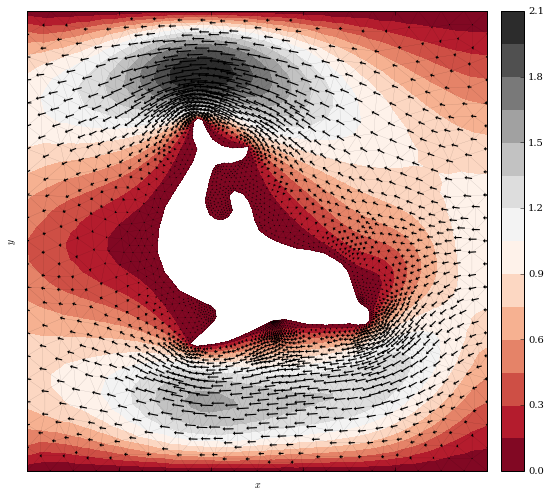

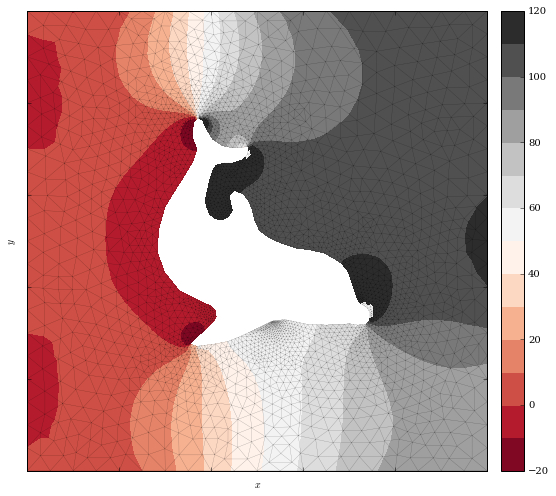

In [22]:
from dolfin import *

# Load mesh and subdomains
mesh        = Mesh("meshes/dolfin_fine.xml.gz")
sub_domains = MeshFunction("size_t", mesh, 
                           "meshes/dolfin_fine_subdomains.xml.gz")

# Define function spaces
V = VectorFunctionSpace(mesh, "CG", 2)
Q = FunctionSpace(mesh, "CG", 1)
I = Identity(2)
W = V * Q

# No-slip boundary condition for velocity 
# x1 = 0, x1 = 1 and around the dolphin
noslip = Constant((0, 0))
bc0    = DirichletBC(W.sub(0), noslip, sub_domains, 0)

# Inflow boundary condition for velocity
# x0 = 1
inflow = Expression(("-sin(x[1]*pi)", "0.0"))
bc1    = DirichletBC(W.sub(0), inflow, sub_domains, 1)

# Boundary condition for pressure at outflow
# x0 = 0
zero = Constant(0)
bc2  = DirichletBC(W.sub(1), zero, sub_domains, 2)

# Collect boundary conditions
bcs = [bc0, bc1, bc2]

# viscosity :
eta = 1.0

def epsilon(u):
  return 0.5*(grad(u) + grad(u).T)

def sigma(u,p):
  return 2*eta*epsilon(u) - p*I

# Define variational problem
u,p = TrialFunctions(W)
v,q = TestFunctions(W)

f   = Constant((0, 0))
a   = inner(sigma(u,p), grad(v))*dx + q*div(u)*dx
L   = -inner(f, v)*dx

# Compute solution
w = Function(W)
solve(a == L, w, bcs)

# Split the mixed solution using deepcopy
# (needed for further computation on coefficient vector)
(u, p) = w.split(True)

print "Norm of velocity coefficient vector: %.15g" % u.vector().norm("l2")
print "Norm of pressure coefficient vector: %.15g" % p.vector().norm("l2")

# # Split the mixed solution using a shallow copy
(u, p) = w.split()

# Save solution in VTK format
#File("output/velocity.pvd") << u
#File("output/pressure.pvd") << p

u0 = project(u[0])
u1 = project(u[1])

from pylab  import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

v0  = u0.compute_vertex_values(mesh)
v1  = u1.compute_vertex_values(mesh)
v   = sqrt(v0**2 + v1**2 + 1e-16)
x   = mesh.coordinates()[:,0]
y   = mesh.coordinates()[:,1]
t   = mesh.cells()

fig = figure(figsize=(8,7))
ax  = fig.add_subplot(111)

v[v > 2.0] = 2.0
cm = get_cmap('cool')
cm = get_cmap('RdGy')
c  = ax.tricontourf(x, y, t, v, 15, cmap=cm)
tp = ax.triplot(x, y, t, '-', color='k', lw=0.2, alpha=0.3)
q  = ax.quiver(x, y, v0, v1, pivot='middle',
                             headwidth=3.5, 
                             headlength=2.0, 
                             headaxislength=2.0)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.axis('equal')
ax.set_xlim([x.min(), x.max()])
ax.set_ylim([y.min(), y.max()])
ax.set_xticklabels([])
ax.set_yticklabels([])
  
divider = make_axes_locatable(gca())
cax  = divider.append_axes('right', "5%", pad="3%")
cbar = colorbar(c, cax=cax) 
tight_layout()

savefig('images/intro/2Dstokes_u.pdf')
show()

v  = p.compute_vertex_values(mesh)

fig = figure(figsize=(8,7))
ax  = fig.add_subplot(111)

v[v >  120] = 120
v[v < -20] = -20

cm = get_cmap('RdGy')
c  = ax.tricontourf(x, y, t, v, 15, cmap=cm)
tp = ax.triplot(x, y, t, '-', color='k', lw=0.2, alpha=0.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis('equal')
ax.set_xlim([x.min(), x.max()])
ax.set_ylim([y.min(), y.max()])
ax.set_xticklabels([])
ax.set_yticklabels([])
  
divider = make_axes_locatable(gca())
cax  = divider.append_axes('right', "5%", pad="3%")
cbar = colorbar(c, cax=cax) 
tight_layout()
savefig('images/intro/2Dstokes_p.pdf')
show()